<a href="https://colab.research.google.com/github/jsKim-prog/AIStudy24/blob/master/RegressorStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 리눅스 명령어로 코랩의 가상머신에 나눔폰트를 설치하고 적용하는 명령어
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (13.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123634 files and direc

In [6]:
# 그래프 외부 클래스 테스트
!pip install import_ipynb   # 코랩 파일 불러오는 리눅스 명령

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.0 MB/s eta 0:00:00


In [2]:
#import import_ipynb
#from google.colab import drive  # ipynb에서 drive로 접근할 수 있도록 설정
# drive.mount('/content/drive')   # 구글 드라이브에 접근 허용 -> content/drive 폴더로 드라이브 내용 불러옴

In [3]:
#!pwd    # 현재 작업중 경로 확인 /content
# %cd /content/drive/MyDrive/ # 작업중인 경로 변경
%cd /content/drive/MyDrive/Colab\ Notebooks

/content/drive/MyDrive/Colab Notebooks


In [7]:
import import_ipynb
from my_viewer import *

In [9]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])


In [10]:
# 훈련세트, 테스트 세트 생성

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight)

print(train_input)  # <- perch_length
print(test_input)    # <- perch_length
print(train_target)  # <- perch_weight
print(test_target)   # <- perch_weight

[24.  37.  44.  40.  21.  25.  21.  40.  26.5 21.  17.4 22.  16.2 20.
 19.6 22.7 40.  23.5 22.  43.  43.  22.  34.5 22.  42.  28.7 24.6 25.6
 28.  27.3 39.  32.8 21.3 37.  22.5 13.7 24.  18.7 40.  22.5 19.  30. ]
[22.  39.  27.5 35.  36.5 23.   8.4 27.5 36.  39.  43.5 18.  27.5 15. ]
[ 145.   690.  1000.   900.   110.   180.   115.   820.   218.   125.
   70.   135.    51.5   85.    85.   145.  1015.   170.   130.  1100.
 1000.   110.   556.   120.  1100.   300.   188.   197.   250.   300.
  900.   514.   130.   700.   150.    32.   225.    78.   850.   130.
   80.   320. ]
[ 120.   820.   250.   840.   685.   150.     5.9  260.   700.   650.
 1000.   100.   265.    40. ]


In [11]:
# 2차원 배열로 변형

train_input = train_input.reshape(-1, 1)    # (요소개수만큼, 1개 특성(열1개))
test_input = test_input.reshape(-1, 1)

print(train_input)
print(test_input)

[[24. ]
 [37. ]
 [44. ]
 [40. ]
 [21. ]
 [25. ]
 [21. ]
 [40. ]
 [26.5]
 [21. ]
 [17.4]
 [22. ]
 [16.2]
 [20. ]
 [19.6]
 [22.7]
 [40. ]
 [23.5]
 [22. ]
 [43. ]
 [43. ]
 [22. ]
 [34.5]
 [22. ]
 [42. ]
 [28.7]
 [24.6]
 [25.6]
 [28. ]
 [27.3]
 [39. ]
 [32.8]
 [21.3]
 [37. ]
 [22.5]
 [13.7]
 [24. ]
 [18.7]
 [40. ]
 [22.5]
 [19. ]
 [30. ]]
[[22. ]
 [39. ]
 [27.5]
 [35. ]
 [36.5]
 [23. ]
 [ 8.4]
 [27.5]
 [36. ]
 [39. ]
 [43.5]
 [18. ]
 [27.5]
 [15. ]]


In [12]:
# 훈련시작
from sklearn.neighbors import KNeighborsRegressor   # 회귀 알고리즘
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [13]:
knr.score(test_input, test_target)

0.9314357919522999

In [14]:
knr.score(train_input, train_target)    # 과소적합

0.9855686443547717

In [15]:
# mean_absolute_error : 절대값 오차를 평균하여 반환
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)   # 테스트세트에 대한 예측
mea = mean_absolute_error(test_target, test_prediction) # 테스트 세트에 대한 평균 절대값 오차 계산
print(mea)

53.214285714285715


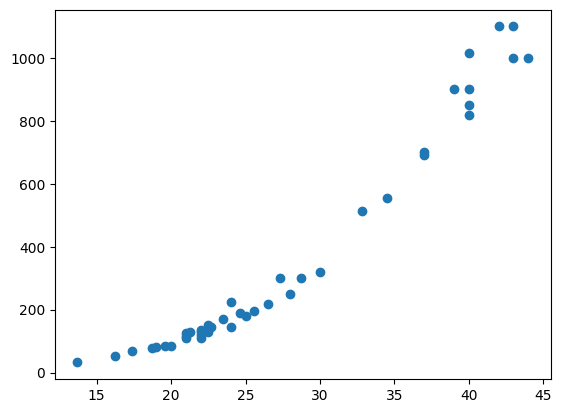

In [16]:
plt.scatter(train_input,train_target)

my_g = Show_PLT()